## 1. Introducción a los Espacios de Color

Las imágenes digitales a color se pueden representar de diferentes maneras. Los dos espacios
de color más comunes en procesamiento digital de imágenes son:

- **RGB (Red, Green, Blue)**:
  - Usado por la mayoría de dispositivos de visualización
  - Cada pixel se representa con 3 valores (Rojo, Verde, Azul)
  - Valores típicos entre 0-255 por canal

- **BGR (Blue, Green, Red)**:
  - Formato utilizado por OpenCV
  - Misma estructura que RGB pero con orden invertido
  - Importante para evitar errores de interpretación

In [1]:
!wget https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png

--2025-04-09 23:35:26--  https://www.dropbox.com/s/do6b49d10ty1dyf/frutos_rojos.png
Resolving www.dropbox.com (www.dropbox.com)... 162.125.5.18, 2620:100:601d:18::a27d:512
Connecting to www.dropbox.com (www.dropbox.com)|162.125.5.18|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw [following]
--2025-04-09 23:35:27--  https://www.dropbox.com/scl/fi/matphwqhnd7rw8daxdnxc/frutos_rojos.png?rlkey=srmhn7v96ddelsu98i283qwlw
Reusing existing connection to www.dropbox.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://uc64746efd726d2b848eacf25315.dl.dropboxusercontent.com/cd/0/inline/CngHB7nFzfjV503cPdkJlksM4h24mPaCfIH7R5-Gt5ISX_-wZCnCY2UWdkn2JKu_6FKFiWWDbwpysZCTadEMsEK-e5ugmxPBdv3VZK_PEYvhfnpxdA1BTBqd11z91VghhT4/file# [following]
--2025-04-09 23:35:28--  https://uc64746efd726d2b848eacf25315.dl.dropboxusercontent.com/cd/0/inline/CngHB7nFzf

## 2. Trabajando con OpenCV (cv2)

OpenCV es una biblioteca especializada en visión por computador y procesamiento de imágenes.
Características importantes:
- Utiliza formato BGR por defecto
- Eficiente en términos de procesamiento
- Ampliamente utilizada en aplicaciones de visión computacional

In [2]:
import cv2
from google.colab.patches import cv2_imshow

Dimensiones de la imagen: (512, 512, 3)
Tipo de datos: uint8
Tamaño en memoria (bytes): 786432


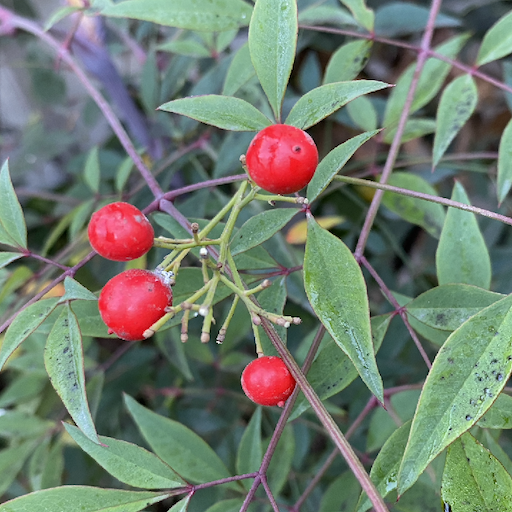

In [3]:
# Lectura de imagen usando OpenCV
imagen_bgr = cv2.imread('frutos_rojos.png')

# Información básica de la imagen
print("Dimensiones de la imagen:", imagen_bgr.shape)
print("Tipo de datos:", imagen_bgr.dtype)
print("Tamaño en memoria (bytes):", imagen_bgr.nbytes)

# Visualización de la imagen completa
cv2_imshow(imagen_bgr)

### 2.1 Análisis de Canales BGR

Cada canal representa la intensidad de un color específico:
- Valores cercanos a 0 indican ausencia del color
- Valores cercanos a 255 indican máxima intensidad

Estadísticas del canal Azul:
Valor mínimo: 0, Valor máximo: 255, Promedio: 111.74


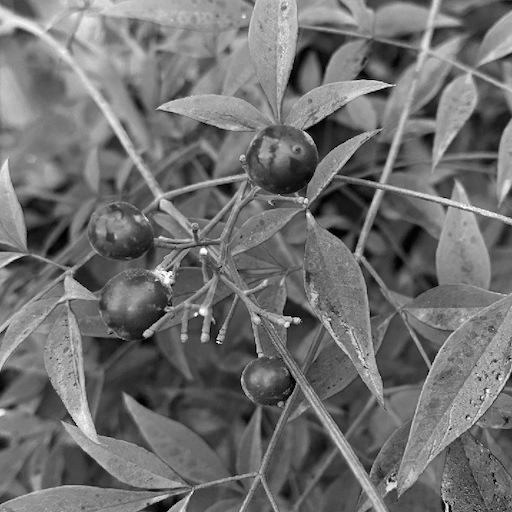

In [4]:
# Canal Azul (B)
B = imagen_bgr[:,:,0]
print("Estadísticas del canal Azul:")
print(f"Valor mínimo: {B.min()}, Valor máximo: {B.max()}, Promedio: {B.mean():.2f}")
cv2_imshow(B)


Estadísticas del canal Verde:
Valor mínimo: 0, Valor máximo: 255, Promedio: 125.10


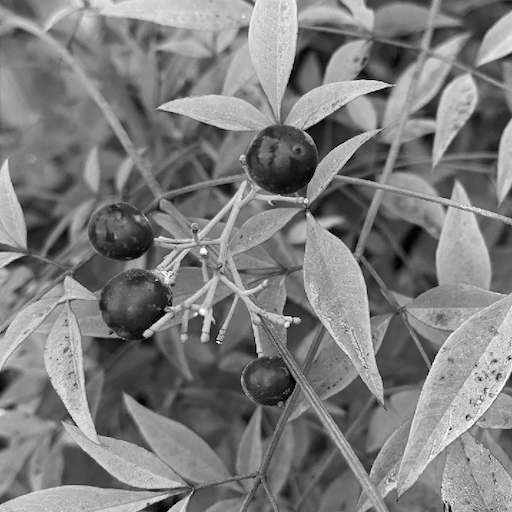

In [5]:
# Canal Verde (G)
G = imagen_bgr[:,:,1]
print("\nEstadísticas del canal Verde:")
print(f"Valor mínimo: {G.min()}, Valor máximo: {G.max()}, Promedio: {G.mean():.2f}")
cv2_imshow(G)


Estadísticas del canal Rojo:
Valor mínimo: 0, Valor máximo: 255, Promedio: 112.77


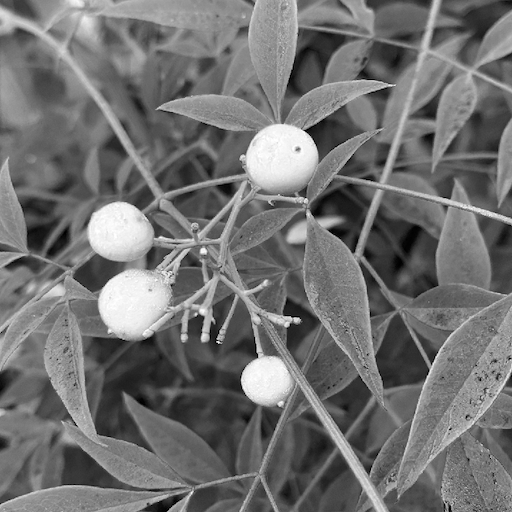

In [6]:
# Canal Rojo (R)
R = imagen_bgr[:,:,2]
print("\nEstadísticas del canal Rojo:")
print(f"Valor mínimo: {R.min()}, Valor máximo: {R.max()}, Promedio: {R.mean():.2f}")
cv2_imshow(R)

## 3. Trabajando con Matplotlib

Matplotlib ofrece funcionalidades más avanzadas de visualización:
- Usa formato RGB por defecto
- Permite personalización detallada de gráficos
- Ideal para presentación y análisis visual

In [7]:
import matplotlib.pyplot as plt

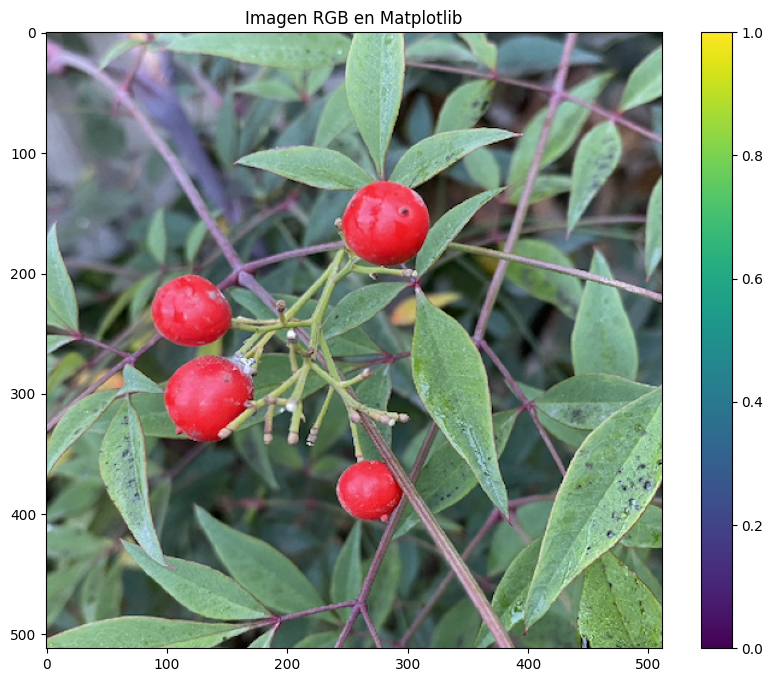

In [8]:
# Lectura y visualización con Matplotlib
imagen_rgb = plt.imread('frutos_rojos.png')
plt.figure(figsize=(10,8))
plt.imshow(imagen_rgb)
plt.title('Imagen RGB en Matplotlib')
plt.axis('on')  # Muestra los ejes para referencia
plt.colorbar()  # Añade barra de color
plt.show()

### 3.1 Visualización Detallada de Canales RGB

In [11]:
# Configuración de subplots
fig, axes = plt.subplots(2, 2, figsize=(15,15))
fig.suptitle('Análisis de Canales RGB', fontsize=16)

# Imagen Original
axes[0,0].imshow(imagen_rgb)
axes[0,0].set_title('Imagen Original')

# Canal Rojo
axes[0,1].imshow(imagen_rgb[:,:,0], cmap='gray')
axes[0,1].set_title('Canal Rojo')

# Canal Verde
axes[1,0].imshow(imagen_rgb[:,:,1], cmap='gray')
axes[1,0].set_title('Canal Verde')

# Canal Azul
axes[1,1].imshow(imagen_rgb[:,:,2], cmap='gray')
axes[1,1].set_title('Canal Azul')

plt.tight_layout()
plt.show()


Output hidden; open in https://colab.research.google.com to view.

## 4. Conversión entre Espacios de Color

Es crucial entender cómo convertir entre BGR y RGB:
- Evita errores de interpretación
- Permite usar correctamente ambas bibliotecas

In [12]:
# Demostración de conversión BGR a RGB
imagen_bgr = cv2.imread('frutos_rojos.png')
imagen_rgb = cv2.cvtColor(imagen_bgr, cv2.COLOR_BGR2RGB)

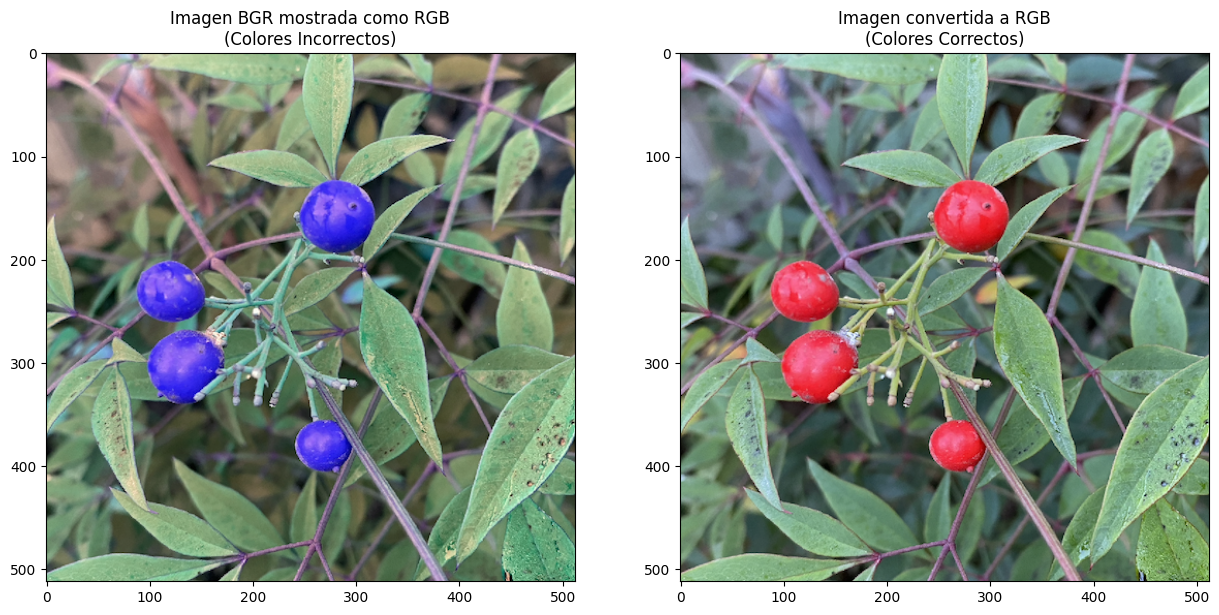

In [13]:
# Visualización comparativa
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15,7))

ax1.imshow(imagen_bgr)
ax1.set_title('Imagen BGR mostrada como RGB\n(Colores Incorrectos)')

ax2.imshow(imagen_rgb)
ax2.set_title('Imagen convertida a RGB\n(Colores Correctos)')

plt.show()

## 5. Resumen y Conceptos Clave

### Puntos Importantes:
1. **Espacios de Color**:
   - RGB: Estándar en visualización
   - BGR: Estándar en OpenCV
   
2. **Bibliotecas**:
   - OpenCV: Orientado a procesamiento
   - Matplotlib: Orientado a visualización

3. **Buenas Prácticas**:
   - Verificar siempre el espacio de color
   - Usar las funciones de conversión adecuadas
   - Documentar el formato usado en cada paso

### Ejercicios Sugeridos:
1. Cargar una imagen propia y analizar sus canales
2. Experimentar con diferentes mapas de color en Matplotlib
3. Practicar conversiones entre BGR y RGB